<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variables-to-control" data-toc-modified-id="Variables-to-control-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variables to control</a></span></li><li><span><a href="#Load-and-plot-results" data-toc-modified-id="Load-and-plot-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and plot results</a></span></li></ul></div>

# Validate 3 channels optimal configuration results

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from qcd.optimizationresults import GlobalOptimizationResultsFullUniversal
from qcd import save_object_to_disk, load_object_from_file
import matplotlib.pyplot as plt
import numpy as np

## Variables to control

In [2]:
# Filenames with results for 3 etas and their optimized parameters to LOAD
filename = '20210423a_C2c_A1_2000_10000_3_6_20'
path = 'results/'

## Load and plot results

In [3]:
results = GlobalOptimizationResultsFullUniversal.load_results(file_name=filename,path=path)

In [4]:
results.validate_optimal_configurations(plays=1000000)

number of eta groups to validate: 120
Going to validate this eta group: (0, 29, 0)
Optimal Probability: 42.1% Validated Probability: 41.64 % Difference (absolute value): 0.46%
Group of etas # 0 of 120
total time taken so far: 0 minutes and 4 seconds
Going to validate this eta group: (0, 59, 0)
Optimal Probability: 58.92% Validated Probability: 58.26 % Difference (absolute value): 0.66%
Group of etas # 20 of 120
total time taken so far: 1 minutes and 31 seconds
Going to validate this eta group: (0, 90, 0)
Optimal Probability: 66.66% Validated Probability: 66.65 % Difference (absolute value): 0.01%
Group of etas # 40 of 120
total time taken so far: 2 minutes and 54 seconds
Going to validate this eta group: (29, 59, 0)
Optimal Probability: 58.67% Validated Probability: 58.34 % Difference (absolute value): 0.33%
Group of etas # 60 of 120
total time taken so far: 4 minutes and 19 seconds
Going to validate this eta group: (29, 90, 0)
Optimal Probability: 66.62% Validated Probability: 66.61 %

In [5]:
save_object_to_disk(results, name='20210424a_C2c_A1_2000_10000_3_6_20_validated_results_1000000', path=path)

In [6]:
validated_results = load_object_from_file(name='20210424a_C2c_A1_2000_10000_3_6_20_validated_results_1000000', path='results/')

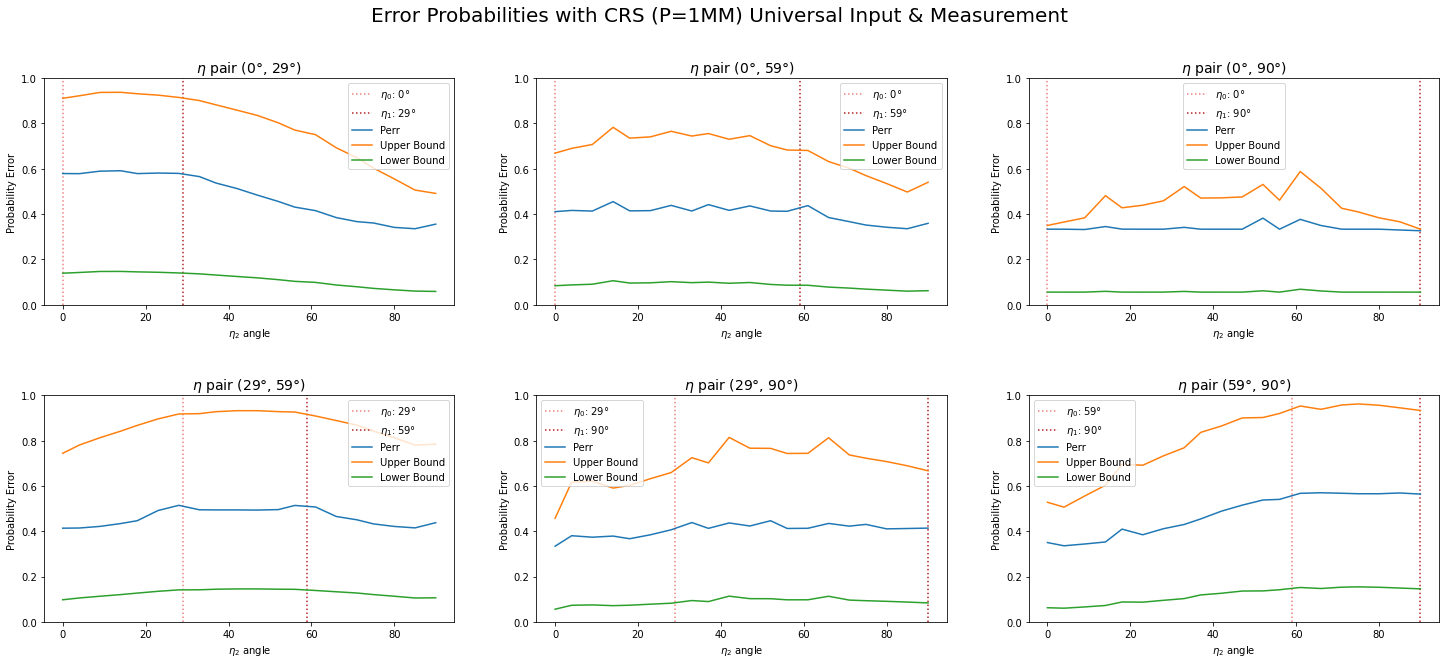

In [17]:
validated_results.plot_3channel_results('CRS (P=1MM) Universal Input & Measurement')

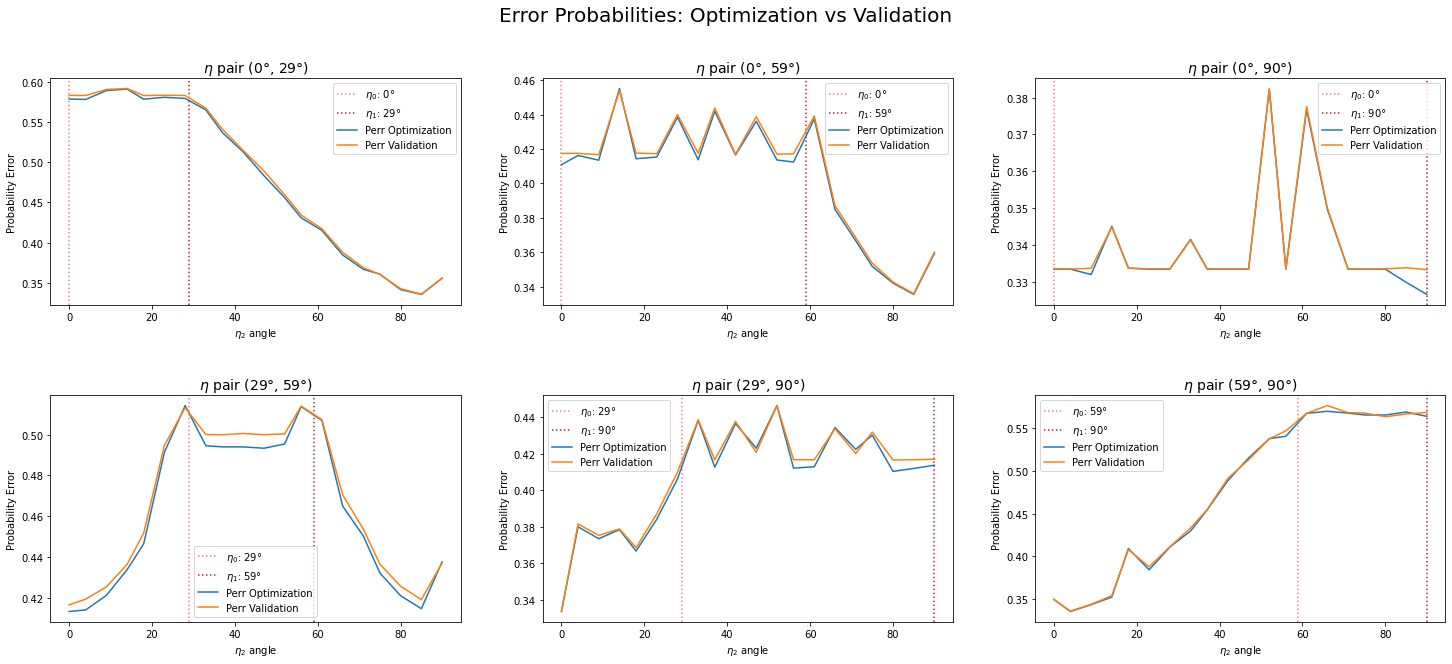

In [8]:
validated_results.plot_global_probabilities()

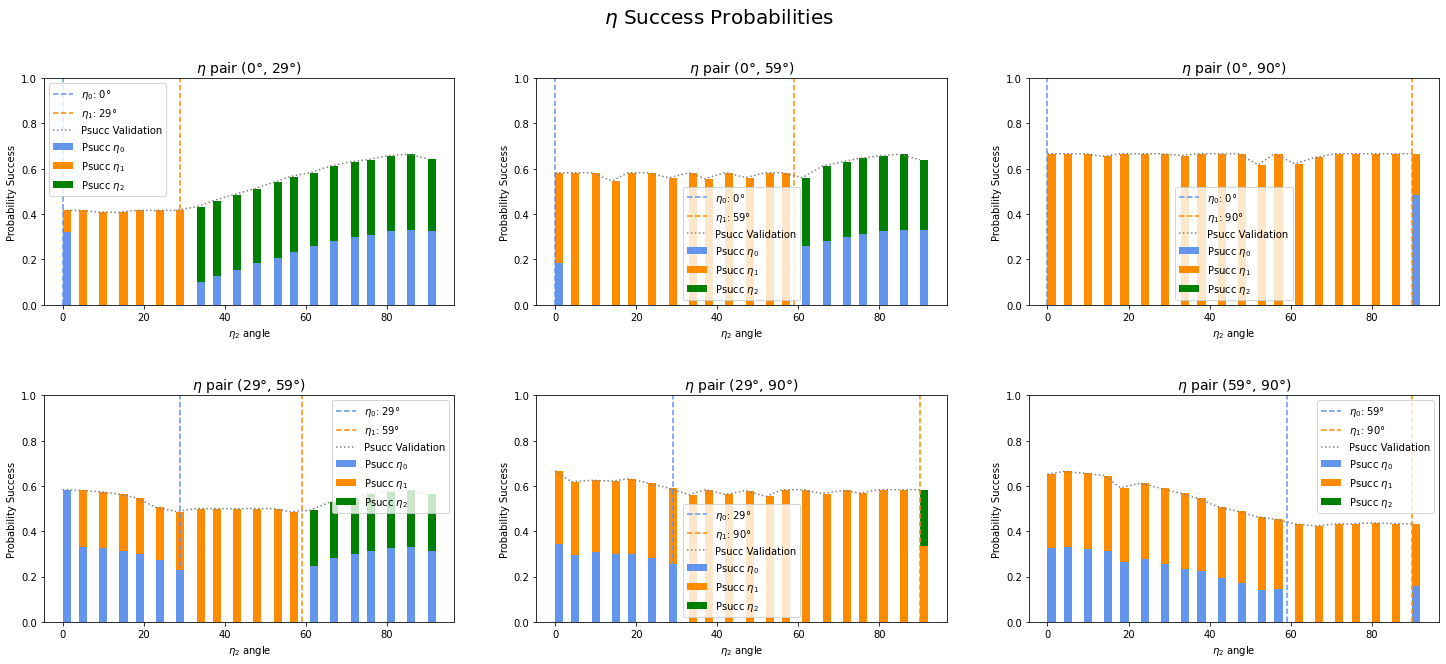

In [9]:
validated_results.plot_eta_success_probabilities()

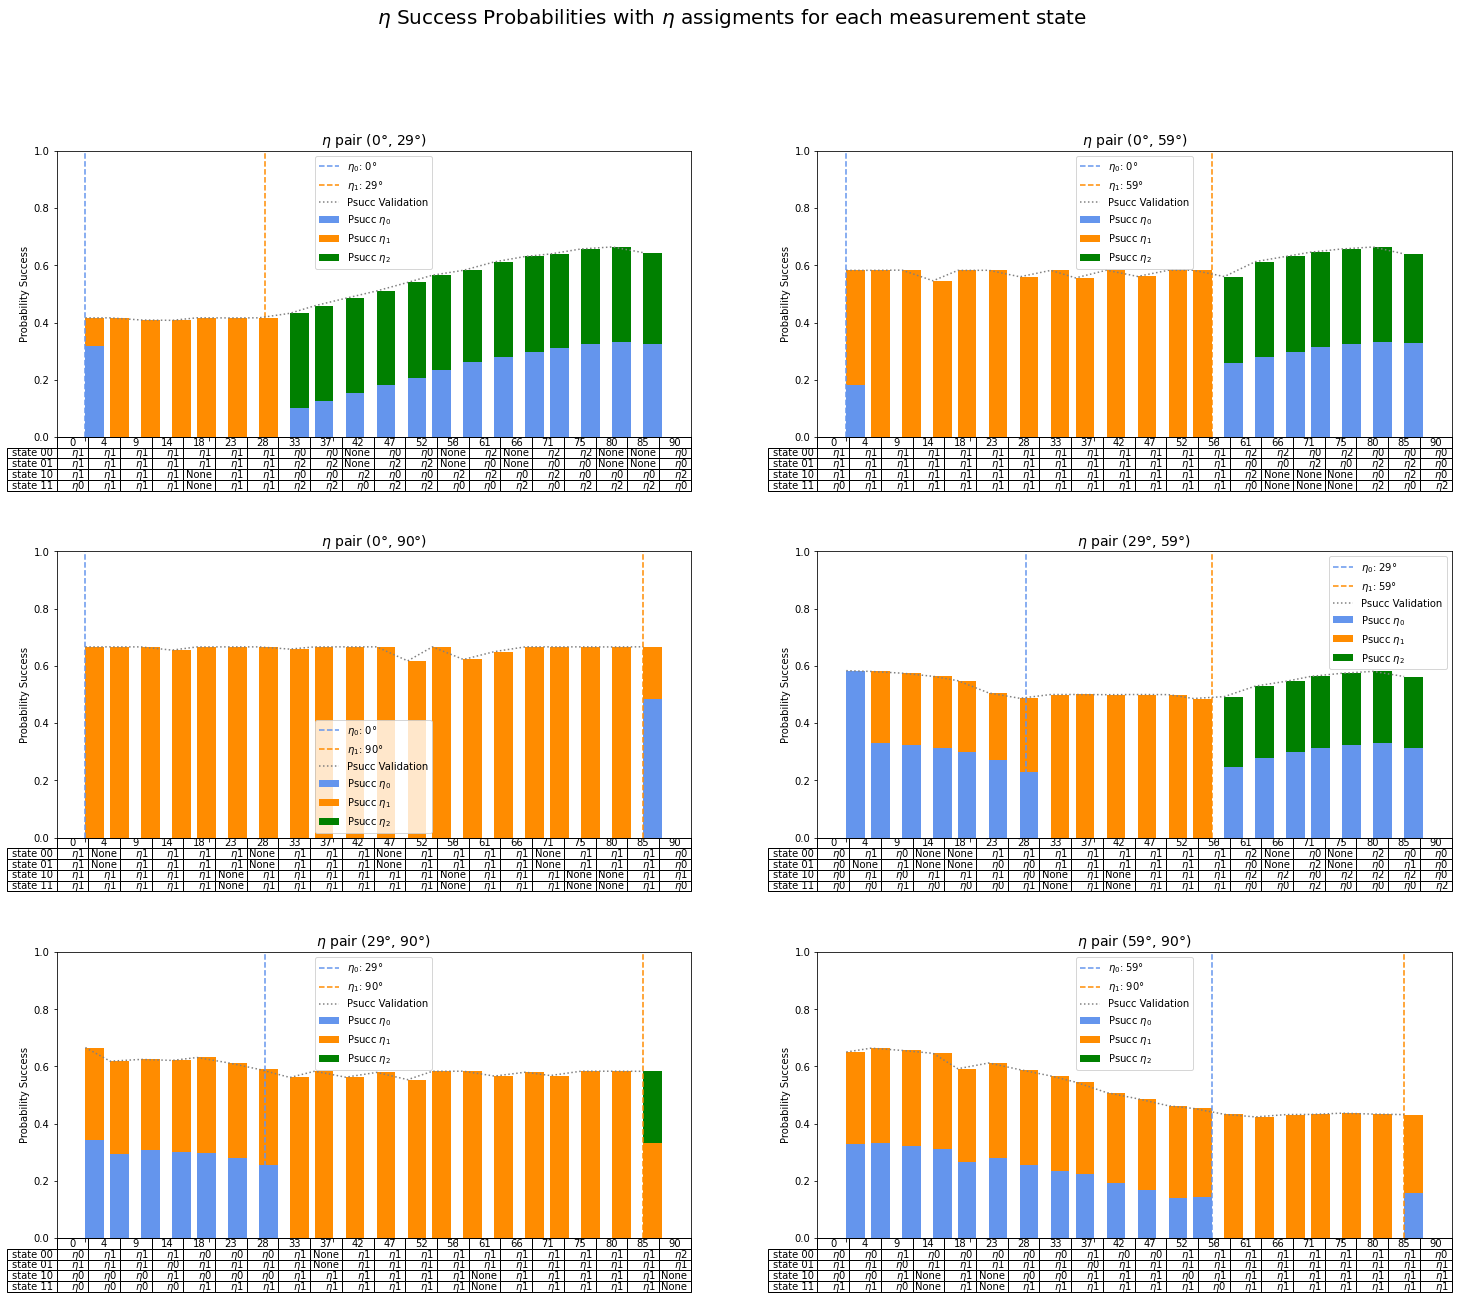

In [10]:
validated_results.plot_eta_assignments()

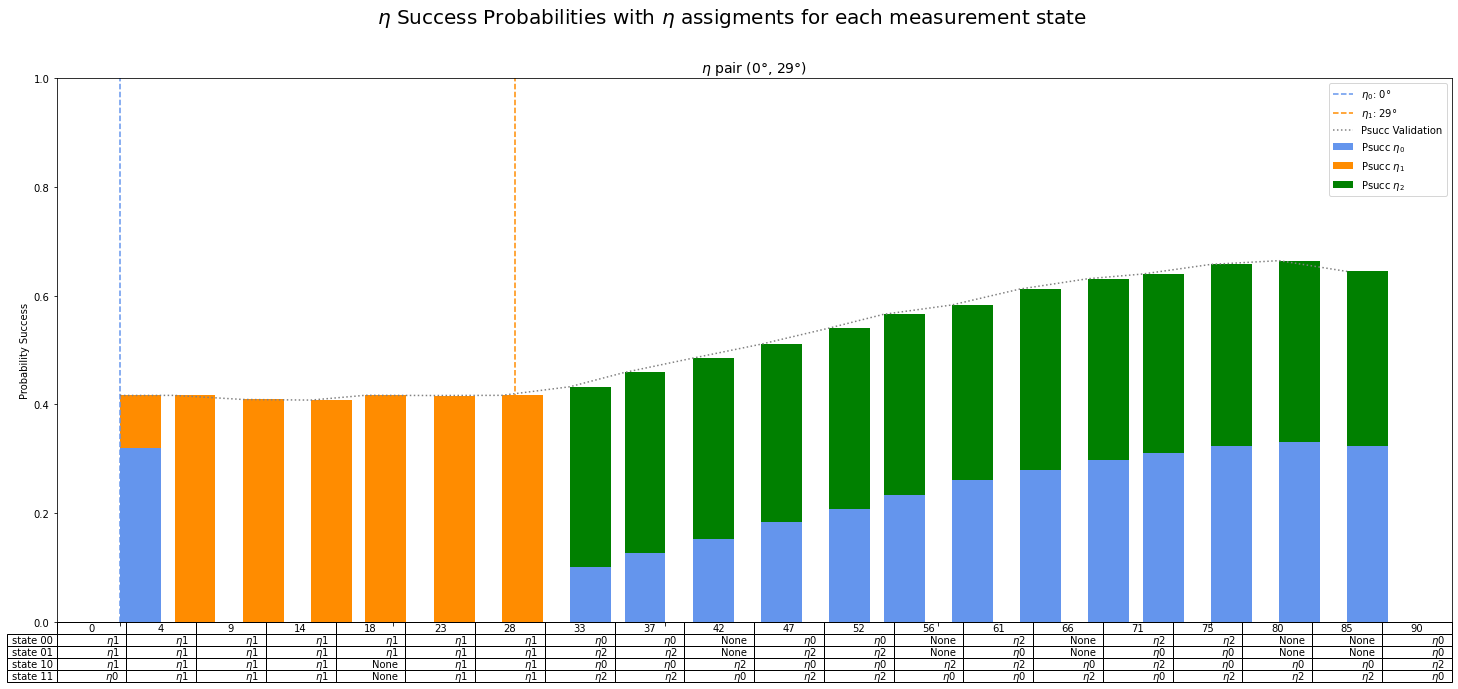

In [11]:
validated_results.plot_eta_assignments(eta_pair_index=0)

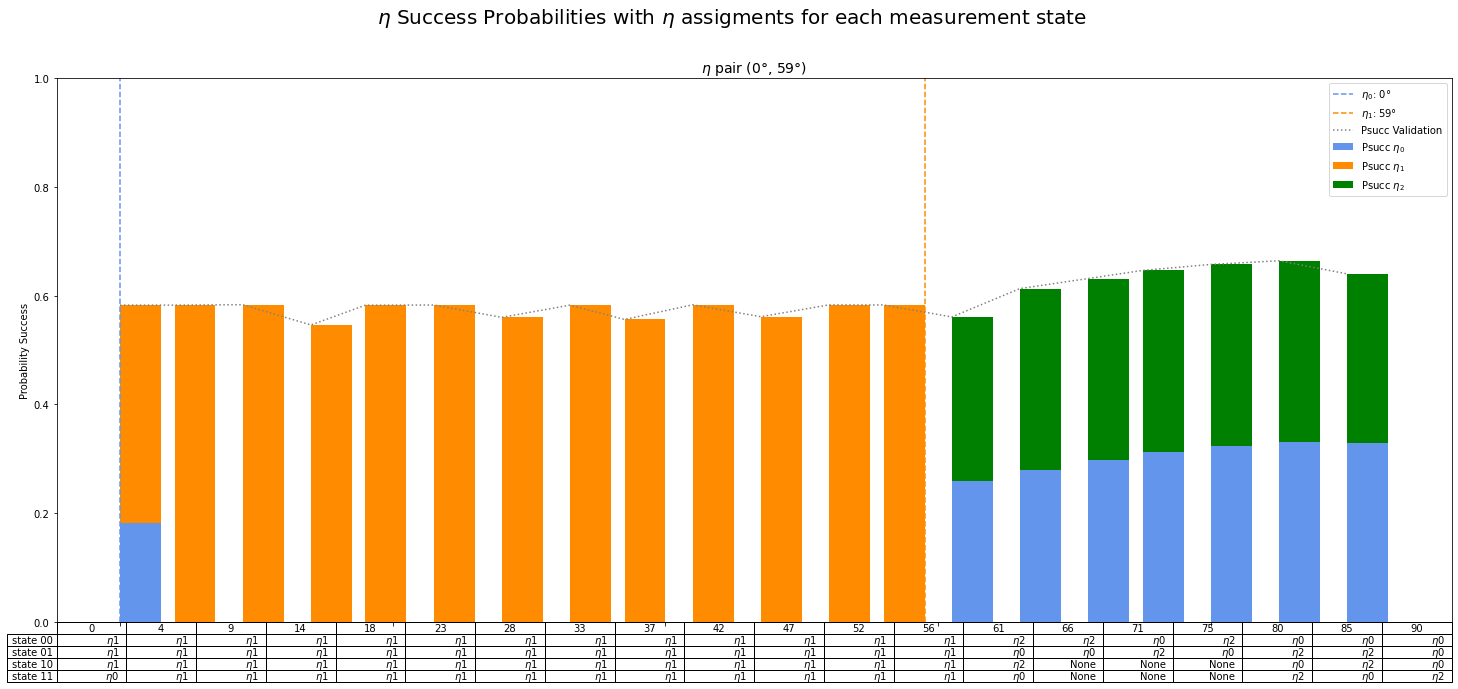

In [12]:
validated_results.plot_eta_assignments(eta_pair_index=1)

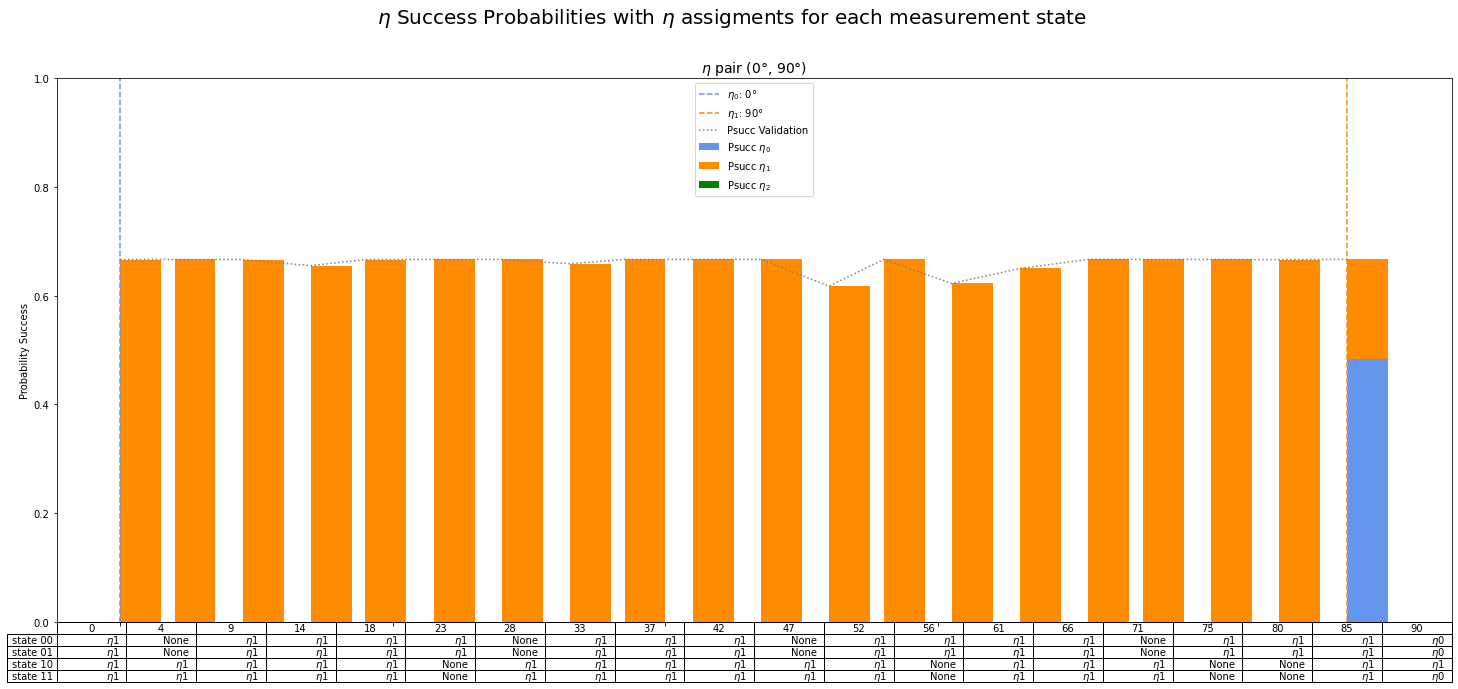

In [13]:
validated_results.plot_eta_assignments(eta_pair_index=2)

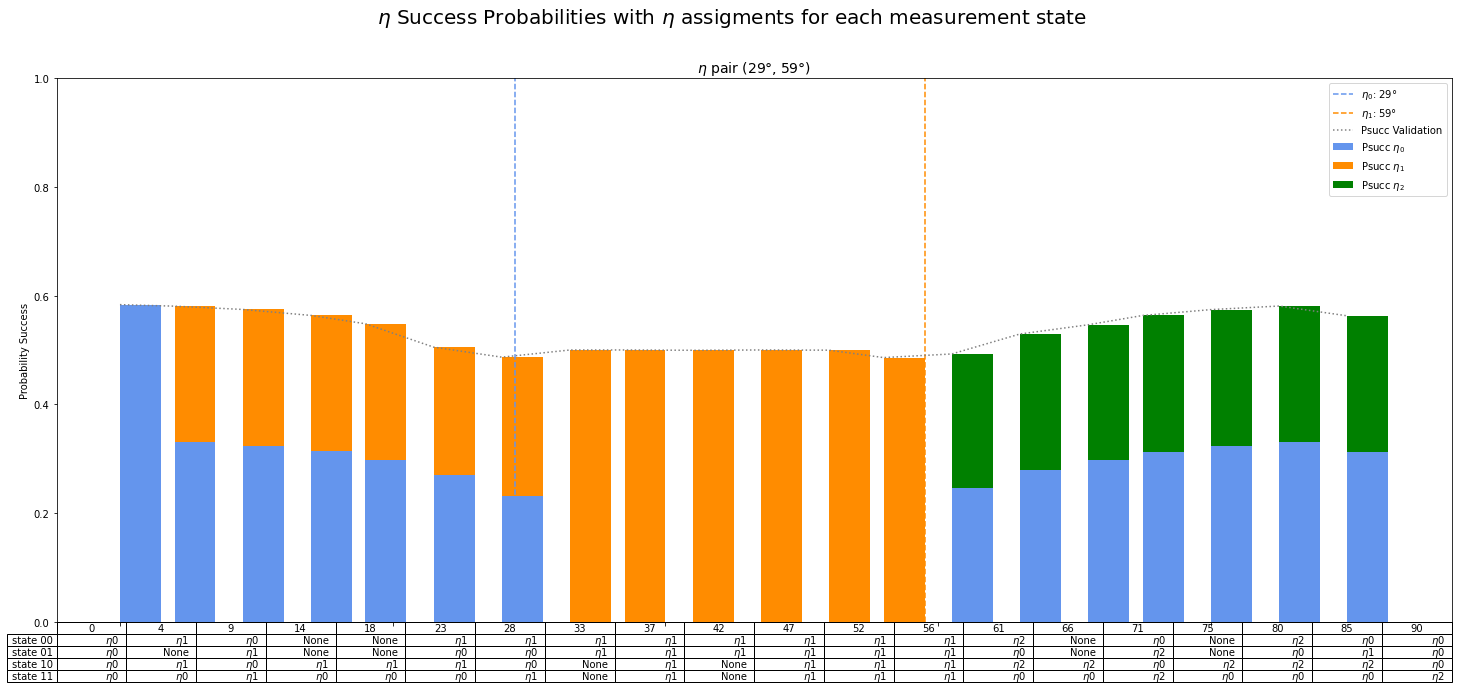

In [14]:
validated_results.plot_eta_assignments(eta_pair_index=3)

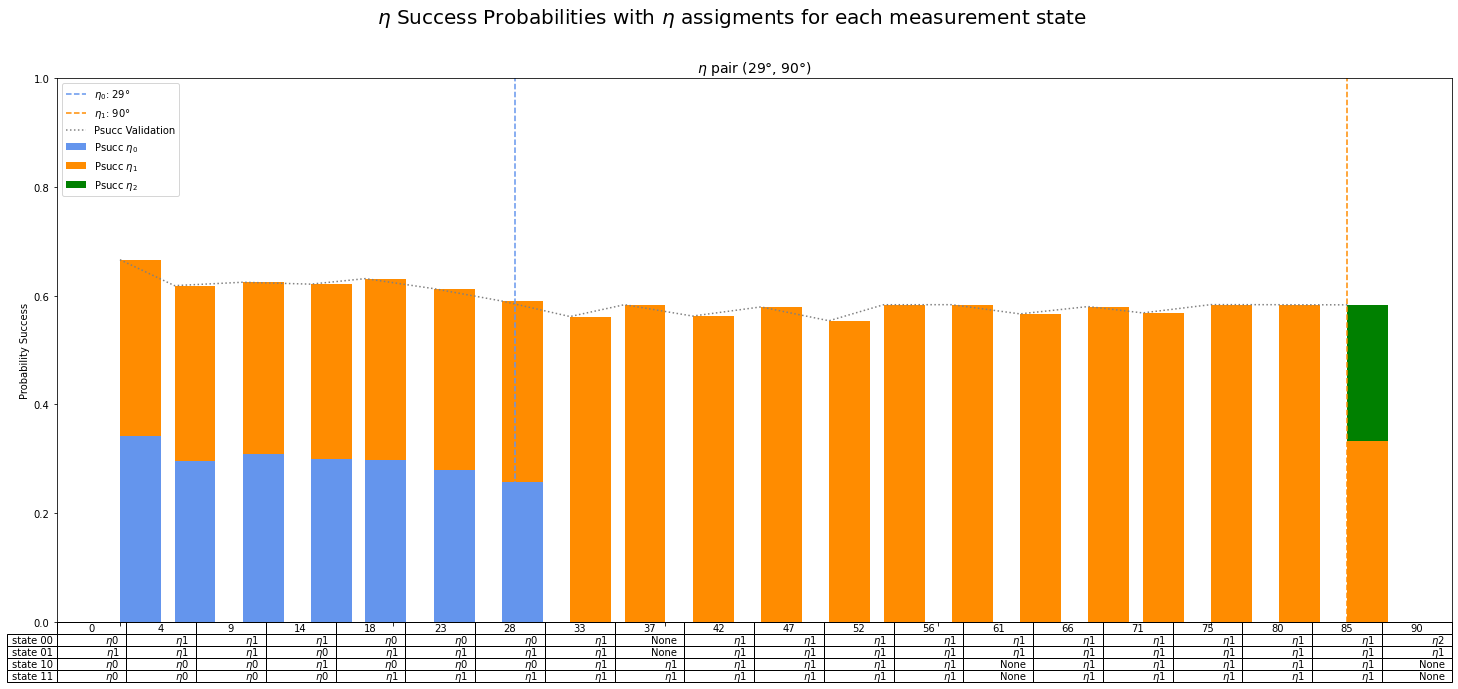

In [15]:
validated_results.plot_eta_assignments(eta_pair_index=4)

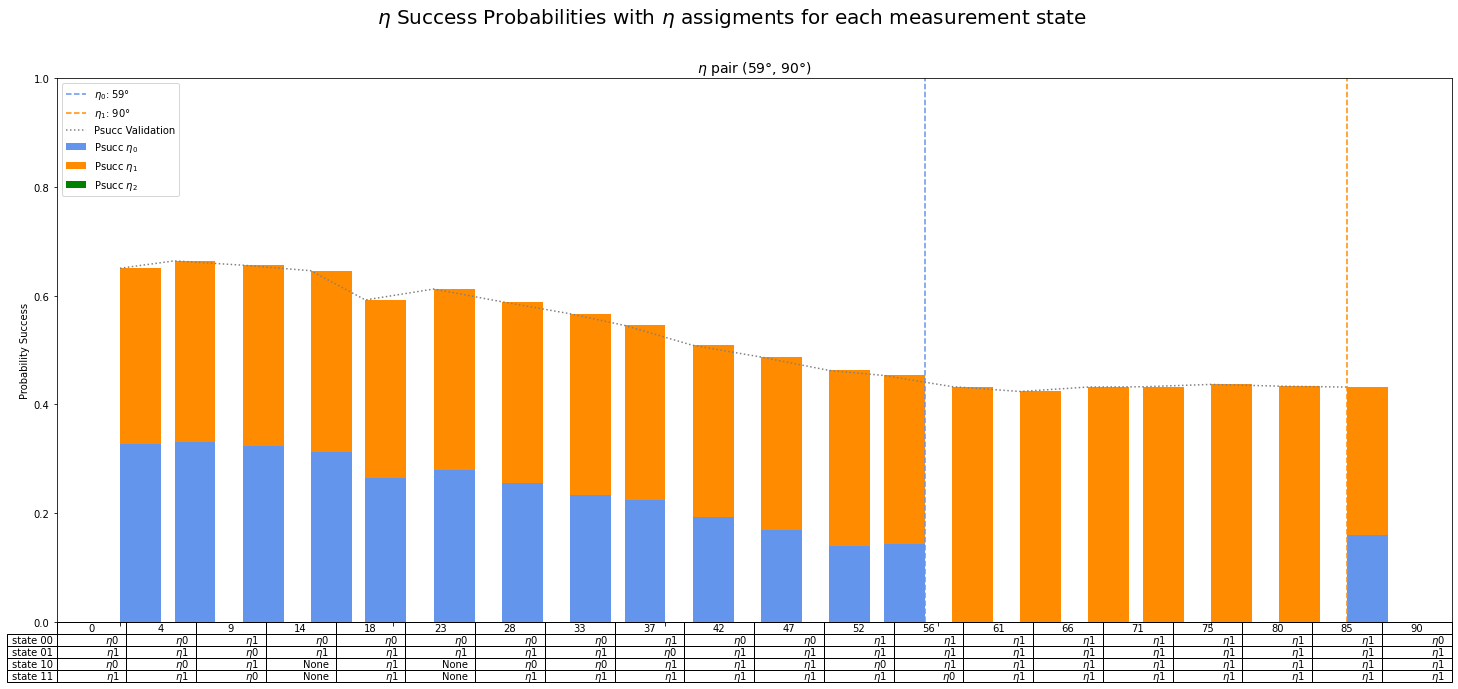

In [16]:
validated_results.plot_eta_assignments(eta_pair_index=5)